1. Index
1. Introduction
1. Objective
1. Data Cleaning / Preparation - JN
1. Exploratory Data Analysis - SP
    - Visualizations
1. Model Selection: Intro, Formula, Code
    - Linear Regression - 2 - SP  
    - Multiple Regression - JN
    - Ridge Regression - JN
    - Lasso Regression - JN
    - Polynomial Regression - SP
    - Random Forest Regression - SP
1. Model Analysis
    - Comparative Analysis with visualization   
1. Conclusion
1. References

**Linear Regression**:

- Predict median_house_value using median_income to understand the direct linear relationship between income and house prices.
- Interaction between median_income and ocean_proximity (near the ocean could impact prices differently based on income). 
- Catgorically Explore how being near the ocean amplifies or diminishes the effect of income on house prices.
- Use longitude and latitude to predict prices based on location to understand how geographic location directly affects house prices.
- Use housing_median_age to know how the age of a property affects prices.
- Predicting overall house prices, predict the price per room (price density). Use total_rooms and median_income to predict median_house_value/total_rooms (i.e., price per room).

1. **Predict Median House Value Using Median Income**:
    - Target: median_house_value
    - Predictor: median_income
    - Objective: Understand the direct relationship between household income and house prices.

1. **Interaction Between Median Income and Ocean Proximity**:
    - Target: median_house_value
    - Predictors:
        - median_income
        - ocean_proximity (categorical feature, needs to be encoded, e.g., one-hot encoding)
        - Interaction term: median_income * ocean_proximity
    - Objective: Analyze how being near the ocean impacts the relationship between income and house prices.

1. **Explore How Ocean Proximity Amplifies/Diminishes the Effect of Income on House Prices**
    - Target: median_house_value
    - Predictors:
        - median_income
        - ocean_proximity (categorical, encoded)
    - Objective: Examine how proximity to the ocean influences house prices differently based on income, without interaction terms.

1. **Use Longitude and Latitude to Predict Prices Based on Location**
    - Target: median_house_value
    - Predictors:
        - longitude
        - latitude
    - Objective: Understand the influence of geographic location (longitude and latitude) on house prices.

1. **Use Housing Median Age to Understand How the Age of a Property Affects Prices**
    - Target: median_house_value
    - Predictors:
        - housing_median_age
    - Objective: Investigate the relationship between the age of the property and house prices.

1. **Predict Price Per Room (Price Density)**
    - Target: median_house_value / total_rooms (price per room)
    - Predictors:
    - median_income
        - total_rooms
    - Objective: Explore how the number of rooms and income together determine the price per room.

**Multiple Linear Regression**:

Predict median_house_value based on several features to understand how different factors combined affect prices.
- median_income, housing_median_age
- median_income, total_rooms, population
- median_income, total_rooms, total_bedrooms, households

1. **Predict Median House Value Using Median Income and Housing Median Age**
    - Target: median_house_value
    - Predictors:
        - median_income
        - housing_median_age
    - Objective: Understand how both income and the age of the property together affect house prices.

1. **Predict Median House Value Using Median Income, Total Rooms, and Population**
    - Target: median_house_value
    - Predictors:
        - median_income
        - total_rooms
        - population
    - Objective: Explore the combined effect of income, the number of rooms, and population on house prices.

1. **Predict Median House Value Using Median Income, Total Rooms, Total Bedrooms, and Households**
    - Target: median_house_value
    - Predictors:
        - median_income
        - total_rooms
        - total_bedrooms
        - households
    - Objective: Investigate how income, the number of rooms, bedrooms, and the number of households together influence house prices.


**Polynomial Regression**:
1. Polynomial Regression with Median Income
    - Target: median_house_value
    - Predictors:
        - median_income
        - median_income^2 (quadratic term)
    - Objective: Capture the non-linear relationship between income and house prices, where prices may increase at a diminishing or accelerating rate as income rises.

**Ridge Regression**:
1. Ridge Regression with Median Income
    - Target: median_house_value
    - Predictors:
        - median_income
    - Objective: Use Ridge to regularize the model and prevent overfitting when predicting house prices based solely on income. The regularization helps control any extreme variations in the median_income coefficient, ensuring the model generalizes well.

**Lasso Regression**:
1. Lasso Regression with Median Income
    - Target: median_house_value
    - Predictors:
        - median_income
    - Objective: Use L1 regularization to predict house prices based on income, allowing for the possibility that the coefficient for median_income could be shrunk to zero if it’s deemed less important in the context of a larger model with multiple features.

**Random Forest Regression**:
1. Random Forest Regression with Median Income
    - Target: median_house_value
    - Predictors:
        - median_income
    - Objective: Use Random Forest to predict house prices based on income, leveraging the ensemble method to capture non-linear relationships and interactions without requiring explicit modeling of these effects. Random Forest can also handle feature importance assessment, allowing for insights into how median_income contributes to predictions.

**Imports**:

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

**Dataset loading**:

In [ ]:
data = pd.read_csv('dataset/housing_original.csv')

**Data Cleaning**:

**Exploratory Data Analysis**:

**Model Selection**:

**Model Analysis**:

**Sampling**:

In [21]:

# Sample 80% of the data for training
train_data = data.sample(frac=0.8, random_state=42)
X_train = train_data[['median_income']]
y_train = train_data['median_house_value']

# Use the remaining data for testing
test_data = data.drop(train_data.index)
X_test = test_data[['median_income']]
y_test = test_data['median_house_value']

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)


In [15]:
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)


In [16]:
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)


In [17]:
poly_features = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_poly_train = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_predictions = poly_model.predict(poly_features.transform(X_test))


In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [19]:
# Step 4: Evaluate models
metrics = {}

# Linear Regression
metrics['Linear'] = {
    'MSE': mean_squared_error(y_test, linear_predictions),
    'R²': r2_score(y_test, linear_predictions)
}

# Ridge Regression
metrics['Ridge'] = {
    'MSE': mean_squared_error(y_test, ridge_predictions),
    'R²': r2_score(y_test, ridge_predictions)
}

# Lasso Regression
metrics['Lasso'] = {
    'MSE': mean_squared_error(y_test, lasso_predictions),
    'R²': r2_score(y_test, lasso_predictions)
}

# Polynomial Regression
metrics['Polynomial'] = {
    'MSE': mean_squared_error(y_test, poly_predictions),
    'R²': r2_score(y_test, poly_predictions)
}

# Random Forest Regression
metrics['Random Forest'] = {
    'MSE': mean_squared_error(y_test, rf_predictions),
    'R²': r2_score(y_test, rf_predictions)
}

# Display the results
for model, scores in metrics.items():
    print(f"{model} - MSE: {scores['MSE']:.2f}, R²: {scores['R²']:.2f}")

Linear - MSE: 6993417642.16, R²: 0.48
Ridge - MSE: 6993432070.32, R²: 0.48
Lasso - MSE: 6993417786.36, R²: 0.48
Polynomial - MSE: 6932015711.68, R²: 0.48
Random Forest - MSE: 9946025916.27, R²: 0.26


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     3501.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:10:14   Log-Likelihood:                -52673.
No. Observations:                4128   AIC:                         1.053e+05
Df Residuals:                    4126   BIC:                         1.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.76e+04   2973.327     16.007

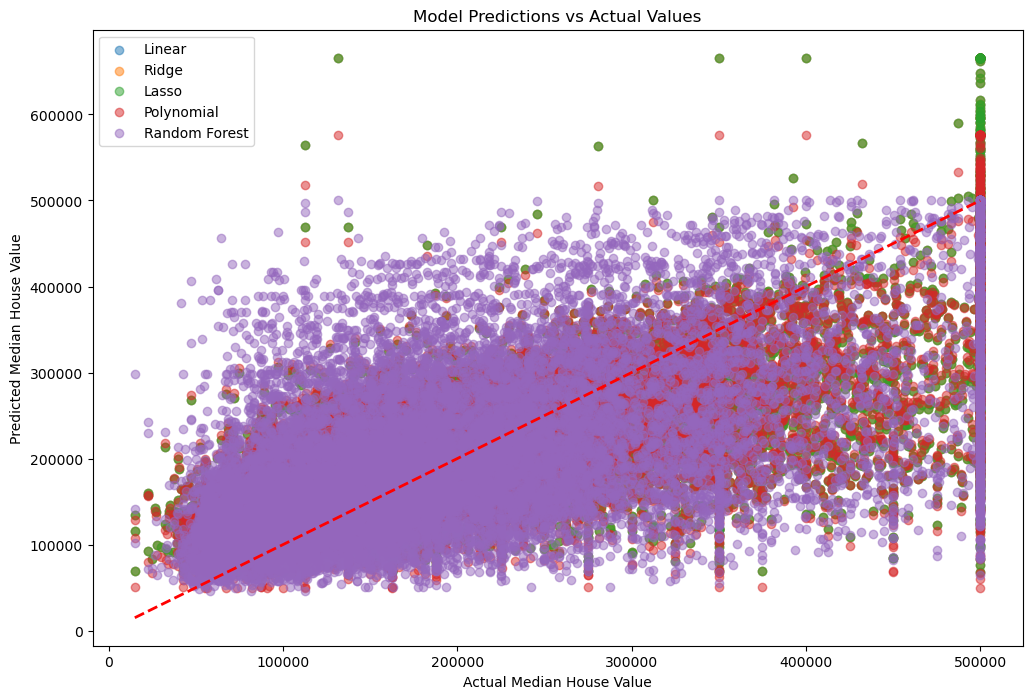

In [20]:
# Step 5: Hypothesis Testing for Linear Regression Coefficients
# Using statsmodels for detailed output
X_with_const = sm.add_constant(X_train)  # Add a constant term for the intercept
linear_model_sm = sm.OLS(y_train, X_with_const).fit()

# Summary includes coefficients, z-scores, and p-values
print(linear_model_sm.summary())

# Z-scores and p-values for each coefficient
z_scores = linear_model_sm.params / linear_model_sm.bse
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))  # two-tailed p-value
print("Z-scores:\n", z_scores)
print("P-values:\n", p_values)

# Chi-squared Test (Example: testing independence of two categorical variables)
# This part assumes you have categorical data, for example, ocean_proximity
# Convert categorical variable to a contingency table
if 'ocean_proximity' in data.columns:
    contingency_table = pd.crosstab(data['ocean_proximity'], data['median_house_value'] > data['median_house_value'].median())
    chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\nChi-squared Test:\nChi2 Stat: {chi2}, P-value: {p_chi2}, Degrees of Freedom: {dof}")

# Step 6: Visualize Results
plt.figure(figsize=(12, 8))
plt.scatter(y_test, linear_predictions, label='Linear', alpha=0.5)
plt.scatter(y_test, ridge_predictions, label='Ridge', alpha=0.5)
plt.scatter(y_test, lasso_predictions, label='Lasso', alpha=0.5)
plt.scatter(y_test, poly_predictions, label='Polynomial', alpha=0.5)
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()